In [73]:
import pandas as pd
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express  as px

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix


with open('credit.pkl', 'rb') as f:
    X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(f)


In [74]:
KNN_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_credit.fit(X_credit_train, y_credit_train) 
print(classification_report(y_credit_test, predict))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



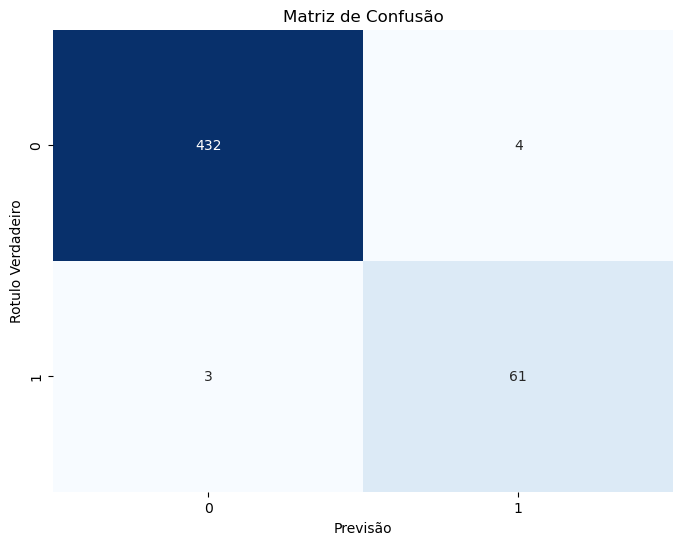

In [75]:
predict = KNN_credit.predict(X_credit_test)

y_true = y_credit_test # Rótulos verdadeiros
y_pred = predict  # Previsões do modelo

# Calcula a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plota a matriz de confusão como um mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Rotulo Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [76]:
label_enconder_teste = LabelEncoder() # Instanciando um objeto da classe LabelEncoder

# Selecionando apenas duas características para visualização
X_census_plot = credit_data[['age', 'income']].values
y_credit_plot =credit_data['default'].values

# Codificando os rótulos (income)
label_encoder = LabelEncoder()
y_credit_plot_encoded = label_encoder.fit_transform(y_credit_plot)

# Plotando os dados
plt.figure(figsize=(10, 6))
plt.scatter(X_credit_plot[:, 0], X_credit_plot[:, 1], c=y_credit_plot_encoded, cmap='viridis', alpha=0.5)
plt.xlabel('income')
plt.ylabel('age')
plt.title('Dados Originais')
plt.colorbar(ticks=[0, 1], label='Default')
plt.show()


NameError: name 'X_credit_plot' is not defined

<Figure size 1000x600 with 0 Axes>

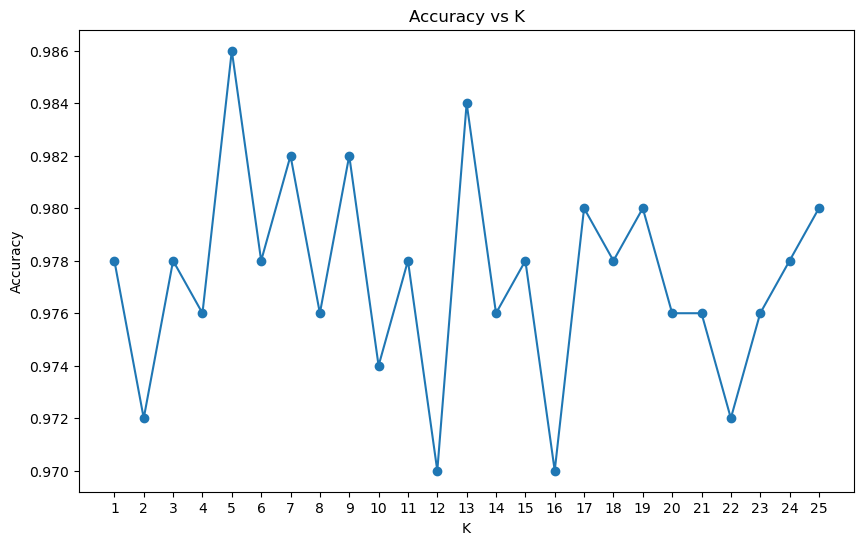

In [ ]:
# Testando diferentes valores de K e plotando a precisão
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_credit_train, y_credit_train)
    y_pred = knn.predict(X_credit_test)
    scores.append(accuracy_score(y_credit_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.xticks(np.arange(1, 26, 1))
plt.show()


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



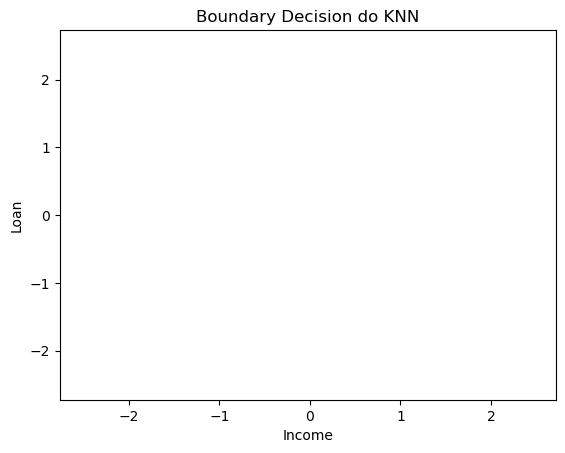

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pickle

# Carregando os dados do arquivo credit.pkl
with open('credit.pkl', 'rb') as f:
    X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(f)

# Treinamento do modelo KNN
KNN_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_credit.fit(X_credit_train, y_credit_train)

# Previsão no conjunto de teste
predict = KNN_credit.predict(X_credit_test)
print(classification_report(y_credit_test, predict))

# Assumindo que as features são income e loan
# Criação da grade de pontos
# Reshape the input data to include a third feature
Z = KNN_credit.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape)])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Boundary Decision do KNN')
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()